
{'Classique': ['60', '18', 'a,.', 'élevé', '60,40', '5'], 'Jazz': ['45', '19', 'a,.', 'moyen', '58,42', '5'], 'Rap': ['20', '20', 'p,m', 'faible', '70,30', '5'], 'pop': ['25', '20', 'p,m', 'moyen', '50,50', '5'], 'rock': ['50', '20', 'p,m', 'moyen', '70,30', '5']}

Clasique = ROUGE  jazz = BLEU  rap = VERT  pop = JAUNE  rock = VIOLET


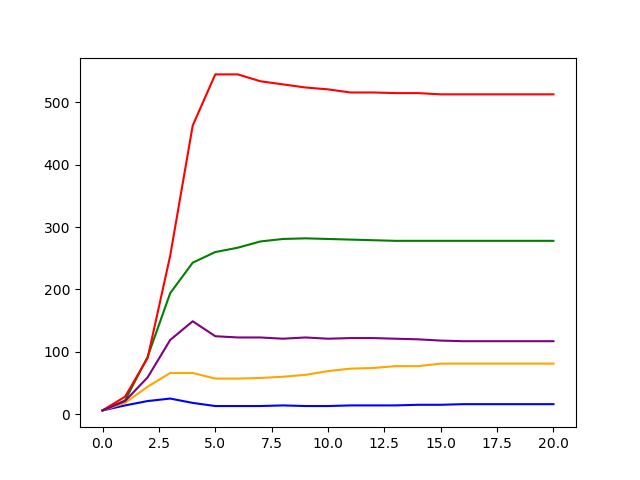

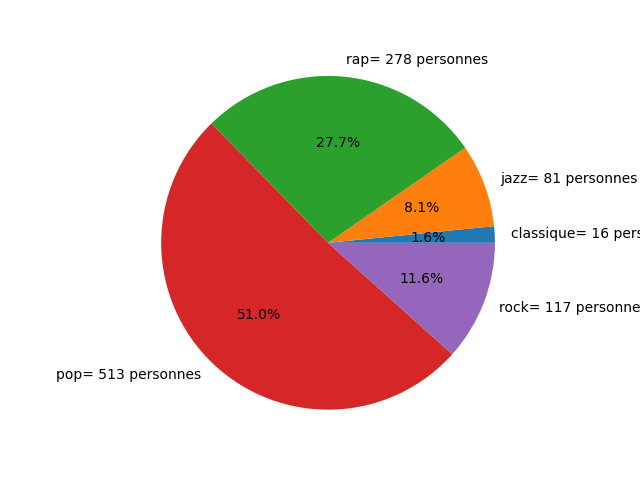

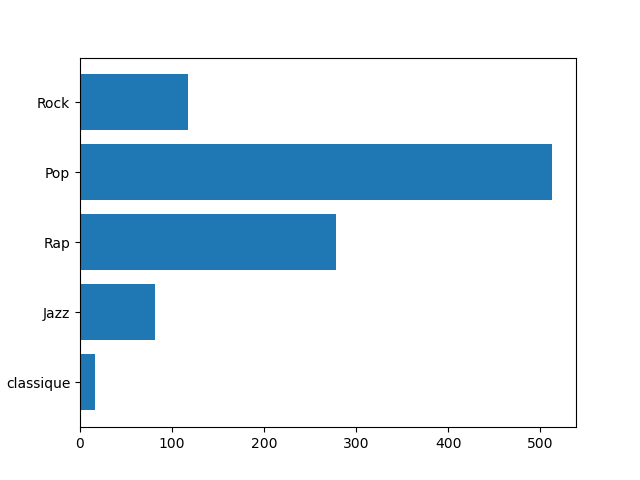

In [6]:
import random
from matplotlib import pyplot as plt

def agent(nb_agent):
    #personne=[age,sexe,grp_social,préfère d'une epoque,education musicale,ami,genre préféré,score]
    Dict={}
    for i in range(nb_agent):
        Dict[i+1]=[random.randint(7,100),
                   random.choice(['Homme','Femme']),
                   random.choice(['populaire','moyenne','aisée']),
                   random.choice(['21 ', '20', '19-17',]),
                   random.choice(['faible', 'moyen', 'élevé']),
                   random.randint(1,10),
                   [],
                   0,]
    Dict[len(Dict)+1]=[60,'Homme','aisée','19-17','élevé',5,["Classique"],5]
    Dict[len(Dict)+1]=[45,'Homme','moyenne','19-17','moyen',5,["Jazz"],5]
    Dict[len(Dict)+1]=[25,'Homme','populaire','20','faible',5,["Rap"],5]
    Dict[len(Dict)+1]=[25,'Femme','populaire','20','moyen',5,["pop"],5]
    Dict[len(Dict)+1]=[30,'Homme','moyenne','20','moyen',5,["rock"],5]
    return Dict

#genre:[group_vise,date d'apparition,ethnicite(Aisee, populaire, Moyen),complexite,sexe écoute,score] 
Genre={"Classique":["60","18","a,.","élevé","60,40","5"],
       "Jazz":["45","19","a,.","moyen","58,42","5"],
       "Rap":["20","20","p,m","faible","70,30","5"],
       "pop":["25","20","p,m","moyen","50,50","5"],
       "rock":["50","20","p,m","moyen","70,30","5"]}

def preference(personne,Genre):
    garder=""
    personne[7]=0
    if len(personne[6])>=1:
        for i in personne[6]:
            for x,y in Genre.items():
                score=0
                if i==x:
                    if personne[0]>int(y[0])-10 and personne[0]<int(y[0])+10:
                        score+=1 #age
                    if (personne[1]=='Homme' and int(y[4][0])>=5) or (personne[1]=='Femme' and int(y[4][3])>=5):
                        score+=1 #sexe
                    if (personne[2]=='populaire' and y[2][0]=='p' or y[2][2]=='p') or (personne[2]=='moyenne' and y[2][0]=='m' or y[2][2]=='m') or (personne[2]=='aisée' and y[2][0]=='a' or y[2][2]=='a'):
                        score+=1 #grp_social
                    if (personne[4]=='faible' and y[3]=='faible') or (personne[4]=='moyen' and y[3]=='moyen') or(personne[4]=='aisée' and y[3]=='aisée'):
                        score+=1 #education_musicale    
                    if (personne[3]=='21' and y[1]=='21') or (personne[3]=='20' and y[1]=='20') or (personne[3]=='19-17' and (y[1]=='17' or y[1]=='18' or y[1]=='19')):
                        score+=1 #epoque
                if score>personne[7]:
                    personne[7]=score
                    garder=x
        if garder!="":
            personne[6]=[garder]   
            
def propagationTotal(personne,Dict,nb_agent):
    liste_ami=[]
    if Personnes[6] != []:
        while len(liste_ami)!=personne[5]:
            agent=random.randint(1,nb_agent+5)
            verf=0
            for x in liste_ami:
                if x==agent:
                    verf=1
            if verf==0:
                liste_ami.append(agent)
        if personne[7]==5:
            for y in liste_ami:
                Dict[y][6].append(personne[6][0])
        if personne[7]==4:
            ami=float(personne[5])*0.8
            for i in range(len(liste_ami)-int(ami)):
                liste_ami.pop()
            for y in liste_ami:
                Dict[y][6].append(personne[6][0])
        if personne[7]==3:
            ami=float(personne[5])*0.6
            for i in range(len(liste_ami)-int(ami)):
                liste_ami.pop()
            for y in liste_ami:
                Dict[y][6].append(personne[6][0])
        if personne[7]==2:
            ami=float(personne[5])*0.4
            for i in range(len(liste_ami)-int(ami)):
                liste_ami.pop()
            for y in liste_ami:
                Dict[y][6].append(personne[6][0])
        if personne[7]==1:
            ami=float(personne[5])*0.2
            for i in range(len(liste_ami)-int(ami)):
                liste_ami.pop()
            for y in liste_ami:
                Dict[y][6].append(personne[6][0])
                
                
###################################################Début du programme###################################################               
nb=1000             #nombre d'agent 
nb_experience=20   #nombre d'experience

Personnes=agent(nb)

#Début              
#initialisation
for x in (Personnes.values()):
    propagationTotal(x,Personnes,nb)
#filtrage_init
for x in (Personnes.values()):
    preference(x,Genre)

Classique=0
Jazz=0
Rap=0
pop=0
rock=0
for x in (Personnes.values()):
    if x[6]==["Classique"]:
        Classique+=1
    if x[6]==["Jazz"]:
        Jazz+=1
    if x[6]==["Rap"]:
        Rap+=1
    if x[6]==["pop"]:
        pop+=1
    if x[6]==["rock"]:
        rock+=1
Y1 = [Classique]
Y2 = [Jazz]
Y3 = [Rap]
Y4 = [pop]
Y5 = [rock]

n=0
for i in range (nb_experience):
    Classique=0
    Jazz=0
    Rap=0
    pop=0
    rock=0
    n+=1
    #propagation
    for x in (Personnes.values()):
        propagationTotal(x,Personnes,nb)
    #filtrage
    for x in (Personnes.values()):
        preference(x,Genre) 
    #courbe
    for x in (Personnes.values()):
        if x[6]==["Classique"]:
            Classique+=1
        if x[6]==["Jazz"]:
            Jazz+=1
        if x[6]==["Rap"]:
            Rap+=1
        if x[6]==["pop"]:
            pop+=1
        if x[6]==["rock"]:
            rock+=1
    Y1.append(Classique)
    Y2.append(Jazz)
    Y3.append(Rap)
    Y4.append(pop)
    Y5.append(rock)
    #pour le pie
    Y1fin=Classique
    Y2fin=Jazz
    Y3fin=Rap
    Y4fin=pop
    Y5fin=rock
    
print("")
print(Genre) 
print("")
print("Clasique = ROUGE"," jazz = BLEU"," rap = VERT"," pop = JAUNE"," rock = VIOLET")

X = []
for i in range(nb_experience+1):
    X.append(i)
    
classique=plt.plot(X, Y1, color='blue')
jazz=plt.plot(X, Y2, color='orange')
rap=plt.plot(X, Y3, color='green')
pop=plt.plot(X, Y4, color='red')
rock=plt.plot(X, Y5, color='purple')
plt.show()

_Classique="classique= "+str(Y1fin)+" personnes"
_Jazz="jazz= "+str(Y2fin)+" personnes"
_Rap="rap= "+str(Y3fin)+" personnes"
_Pop="pop= "+str(Y4fin)+" personnes"
_Rock="rock= "+str(Y5fin)+" personnes"
etiq=[_Classique,_Jazz,_Rap,_Pop,_Rock]
X=[Y1fin, Y2fin, Y3fin, Y4fin, Y5fin]
fig1, ax1 = plt.subplots()
ax1.pie(X, labels = etiq ,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

x=[1,2,3,4,5]
y=[Y1fin,Y2fin,Y3fin,Y4fin,Y5fin]
etiquette=["classique","Jazz","Rap","Pop","Rock"]
plt.barh(x, y, tick_label = etiquette)
plt.show()